In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import math

from sklearn import tree
from sklearn.model_selection import train_test_split


%matplotlib inline
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from __future__ import print_function


from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
#Funções auxiliares
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12,10))
    cmap = sns.diverging_palette(220,10, as_cmap=True)
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={'shrink':.9}, 
        ax=ax, 
        annot=True, 
        annot_kws={'fontsize':12}
    )
    
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df,row = row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

In [4]:
#Adaptado de https://www.kaggle.com/sachinkulkarni/titanic/an-interactive-data-science-tutorial
#carrega a base de dados

# Usar se estiver rodando pelo Colab
# from google.colab import files
#import io
#uploaded = files.upload()

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
full_data = [train, test]

In [5]:
#Identifica as características presentes
train.columns.values

#Descrição das variáveis
#We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:
#Variable Description
#Survived: Survived (1) or died (0)
#Pclass: Passenger's class
#Name: Passenger's name
#Sex: Passenger's sex
#Age: Passenger's age
#SibSp: Number of siblings/spouses aboard
#Parch: Number of parents/children aboard
#Ticket: Ticket number
#Fare: Fare
#Cabin: Cabin
#Embarked: Port of embarkation

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
#Cria a base de treinamento para o projeto (70% das amostras)
full = train.append(test , ignore_index = True)
titanic = full[: train.shape[0]]
print("Datasets:\nCompleto: " , full.shape, "\nTreinamento:", titanic.shape)


Datasets:
Completo:  (1309, 12) 
Treinamento: (891, 12)


C:\Users\lucas\Anaconda3\envs\HandTracking\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
#Imprime as primeiras amostras, juntamento com o cabeçalho
titanic.head()



,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
#Análise dos dados. Observe que é possível identificar dados inconsistentes. Por exemplo, idade mínima de 0.42!
titanic.describe()


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


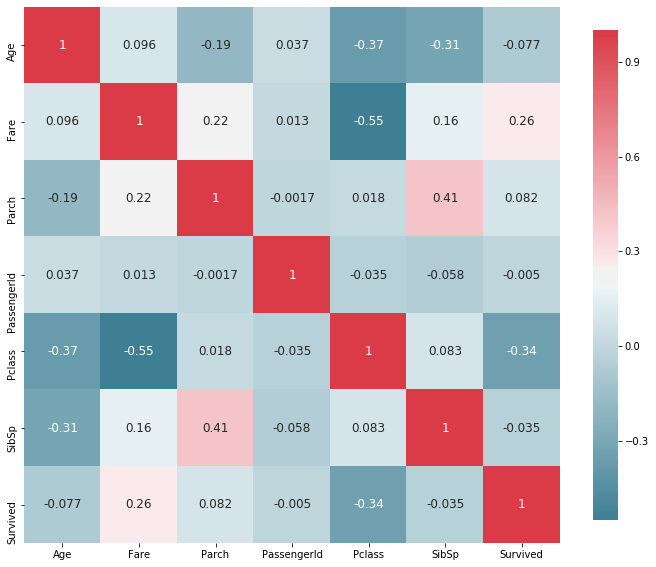

In [9]:
#Correlação entre as características.
#Pode dar uma ideia do que está relacionado com o que.
plot_correlation_map(titanic)

C:\Users\lucas\Anaconda3\envs\HandTracking\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


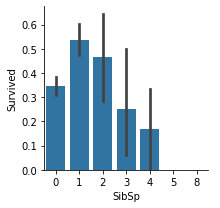

In [10]:
#Distribuição das amostras dentro de uma mesma classe
#Visualize a "Survival Rate" em relação aos seguintes atributos: Embarked, Sex, Pclass, SibSp, Parch
plot_categories(titanic, cat = 'SibSp', target = 'Survived')

In [11]:
#A PARTIR DESTE PONTO SÃO CARREGADOS E PROCESSADOS OS ATRIBUTOS

In [12]:
#Altera o atributo "Sex" de valores nominais (Male/Female)para 0 e 1
sex = pd.Series(np.where(full.Sex=='male', 1, 0), name = 'Sex')

In [13]:
#Cria uma nova variável para cada valor único de "Embarked" (no caso, Embarked_C  Embarked_Q  Embarked_S)
embarked = pd.get_dummies(full.Embarked, prefix='Embarked')
print(embarked.head())
#Cria uma nova variável para cada valor único de "Pclass"
pclass = pd.get_dummies(full.Pclass , prefix='Pclass' )
print(pclass.head())

   Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1
   Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1


In [14]:
#Muitos algoritmos requerem que todas as amostras possuam valores atribuídos para todas as características. 
#No caso de dados faltantes, uma possibilidade é preenchê-los com o valor médio das demais observações.

#Cria o dataset
imputed = pd.DataFrame()

#Preenche os valores que faltam em "Age" com a média das demais idades
imputed['Age'] = full.Age.fillna(full.Age.mean())

#O mesmo para "Fare"
imputed['Fare'] = full.Fare.fillna(full.Fare.mean())

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [15]:
#As distinções refletiam o status social e podem ser utilziados para prever a probabilidade de sobrevivência

title = pd.DataFrame()

#Extrai o título de cada nome
title['Title'] = full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

#Lista agregada de títulos
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

#Faz o mapeamento de cada título
title['Title'] = title.Title.map(Title_Dictionary)
#Cria uma nova variável para cada título
title = pd.get_dummies(title.Title)

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [16]:
#Extrai a categoria da cabine a partir do número
cabin = pd.DataFrame()

#Substitui dados faltantes por "U" (Uknown)
cabin['Cabin'] = full.Cabin.fillna( 'U' )

#Mapeia cada valor de cabine com a letra
cabin['Cabin'] = cabin['Cabin'].map(lambda c : c[0])

#Cria uma variável para cada categoria
cabin = pd.get_dummies(cabin['Cabin'] , prefix = 'Cabin')

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [17]:
#Extrai a classe de cada ticket a partir do seu número
#Caso não tenha prefixo, retorna XXX
def cleanTicket( ticket ):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

#Cria uma nova variável para cada caso
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
#Cria variáveis para representar o tamanho da família e também cada categoria
family = pd.DataFrame()

#Cria nova característica que representa o tamanho da família (quantidade de membros)
family['FamilySize'] = full['Parch'] + full['SibSp'] + 1

#Cria nova características para representar o tipo de família 
family['Family_Single'] = family['FamilySize'].map(lambda s : 1 if s == 1 else 0)
family['Family_Small']  = family['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)
family['Family_Large']  = family['FamilySize'].map(lambda s : 1 if 5 <= s else 0)

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


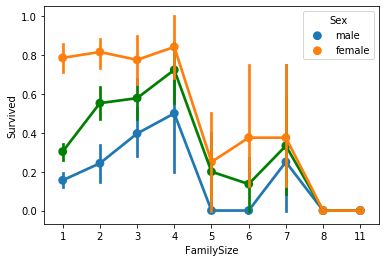

In [19]:
family['Survived'] = full['Survived']
family['Sex'] = full['Sex']

sns.pointplot('FamilySize', 'Survived', data=family, color='g')
sns.pointplot('FamilySize', 'Survived', 'Sex', data=family)

In [20]:
#Seleciona as características que serão incluídas no descritor (vetor de características)
full_X = pd.concat([imputed, embarked, family, sex, title] , axis=1)
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Family_Single,Family_Small,Family_Large,Survived,Sex,Sex,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,0,1,2,0,1,0,0.0,male,1,0,0,1,0,0,0
1,38.0,71.2833,1,0,0,2,0,1,0,1.0,female,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,1,0,0,1.0,female,0,0,1,0,0,0,0
3,35.0,53.1000,0,0,1,2,0,1,0,1.0,female,0,0,0,0,1,0,0
4,35.0,8.0500,0,0,1,1,1,0,0,0.0,male,1,0,0,1,0,0,0


# Tratando os dados

In [21]:
print("Missing data counts in Training Data : ")
print(train.isnull().sum())

print("Missing data counts in Test Data : ")
print(test.isnull().sum())

print("Percentage of data missing Training Data: ")
print(train.isnull().sum()/train.shape[0])

print("Percentage of data missing Test Data: ")
print(test.isnull().sum()/test.shape[0])

Missing data counts in Training Data : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing data counts in Test Data : 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Percentage of data missing Training Data: 
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
Percentage of data missing Test Data: 
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex 

Observation:

Train Data:
About 77% data is missing from the 'Cabin' column. We can drop that column.
Only two data points are missing from 'Embarked'
Age has about 20% missing data.

Test Data:
1 missing data point in Fare
About 20% missing data in Age
78 % missing data in Cabin.

We can safely remove the column Cabin from both Train and Test Data

In [22]:
columns_to_drop = []
columns_to_drop.append('Cabin')

In [23]:
# We can see that all the passengers with similar data points have a Fare of either 7 or 15. Lets set the Fare to 14.
test[test["Fare"].isnull()]


# Extrair todos os titulos do conjunto de treinamento
def extract_titles(df):
    pos = df.columns.get_loc('Name')
    titles = set({})
    for row in df.values:
        title = row[pos].split(',')[1].split('.')[0] + '.'.strip()
        titles.add(title)

    return titles


# Adicionar uma coluna nova de titulos para o conjunto de treinamento
def add_titles_to_df(df) :
    titles = extract_titles(df)
    pos = df.columns.get_loc('Name')
    title_list = []
    for row in df.values:
        for title in titles:
            if title in row[pos]:
                title_list.append(title)
                break
    df['Title'] = title_list
    return df

# Adicionar uma coluna com os titulos no conjunto de treinamentos
train_data = add_titles_to_df(train)
test_data = add_titles_to_df(test)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [24]:
# Foi verificado que existem titulos com poucas entradas, o que pode indicar ruidos
train_data['Title'].value_counts()


 Mr.              517
 Miss.            182
 Mrs.             125
 Master.           40
 Dr.                7
 Rev.               6
 Col.               2
 Mlle.              2
 Major.             2
 Lady.              1
 Sir.               1
 the Countess.      1
 Capt.              1
 Ms.                1
 Mme.               1
 Don.               1
 Jonkheer.          1
Name: Title, dtype: int64

In [25]:
# Combinando os titulos incomuns com os comuns
male_titles = [' Col.',' Major.',' Capt.',' Jonkheer.',' Don.',' Sir.']
female_titles = [' Lady.',' Mme.',' the Countess.',' Dona.',' Mlle.']

def replace_uncommon_titles(df,new_title,title_list):
    pos = df.columns.get_loc('Title')
    for title in title_list:
        for i in range(0,df.shape[0]):
            if df.iloc[i,pos] == title:
                print(title)
                df.iloc[i,pos] = new_title                
    return df

train_data = replace_uncommon_titles(train_data,' Mr.',male_titles)
train_data = replace_uncommon_titles(train_data," Miss.",female_titles)
test_data = replace_uncommon_titles(test_data," Mr.",male_titles)
test_data = replace_uncommon_titles(test_data," Miss.",female_titles)

# Checando os dados de cada titulo
titles = list(train_data['Title'].value_counts().index)
for title in titles:
    print("Title train:: ",title)
    print(train_data[train_data['Title'] == title].describe()["Age"])
    print("Title test:: ",title)
    print(test_data[test_data['Title'] == title].describe()["Age"])

 Col.
 Col.
 Major.
 Major.
 Capt.
 Jonkheer.
 Don.
 Sir.
 Lady.
 Mme.
 the Countess.
 Mlle.
 Mlle.
 Col.
 Col.
 Dona.
Title train::   Mr.
count    406.000000
mean      32.740148
std       12.930425
min       11.000000
25%       23.000000
50%       30.000000
75%       39.750000
max       80.000000
Name: Age, dtype: float64
Title test::   Mr.
count    185.000000
mean      32.194595
std       11.891720
min       14.000000
25%       23.000000
50%       29.000000
75%       40.000000
max       67.000000
Name: Age, dtype: float64
Title train::   Miss.
count    151.000000
mean      22.066225
std       12.983121
min        0.750000
25%       14.750000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64
Title test::   Miss.
count    65.000000
mean     22.039846
std      10.593381
min       0.170000
25%      18.000000
50%      22.000000
75%      30.000000
max      45.000000
Name: Age, dtype: float64
Title train::   Mrs.
count    108.000000
mean      35.898148
st

In [26]:
# Utilizando os titulos para aproximar as idades faltantes
age_mean = train_data.groupby("Title").mean()['Age']

def fill_age_na(df,age_mean):
    rows_with_age_missing = df[df['Age'].isnull()]
    pos = df.columns.get_loc("Age")
    for title in age_mean.index:
        passengerIds = rows_with_age_missing[rows_with_age_missing['Title'] == title]["PassengerId"]
        for Id in passengerIds:
            df.iloc[df[df['PassengerId'] == Id].index.values,pos] = age_mean[title]
    return df

train_data = fill_age_na(train_data,age_mean)
test_data = fill_age_na(test_data,age_mean)

train_data[train_data['Age'].isnull()]
test_data[test_data['Age'].isnull()]
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [27]:
# Filling Embarked with mode 'S'
train_data['Embarked']= train_data['Embarked'].fillna(value='S',axis=0)

# Dropping Ticket because it's just a name and Fare
# because it has good correlation with Pclass
columns_to_drop.extend(["Ticket","Fare"])

def drop_columns(df,list_of_columns):
    return df.drop(list_of_columns,axis=1)

train_data = drop_columns(train_data,columns_to_drop)
test_data = drop_columns(test_data,columns_to_drop)

# Adding FamilySize because it showed high survival rate for women with family size below 4
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp'] + 1
test_data['FamilySize'] = test_data['Parch'] + test_data['SibSp'] + 1

# https://www.kaggle.com/noelmat/eda-data-cleaning-and-tsne-on-titanic

In [29]:
# Salvando os dados modificados
cleaned_train_data = train_data
cleaned_test_data = test_data

cleaned_train_data.to_csv('cleaned_train_data.csv', encoding='utf-8', index=False)
cleaned_test_data.to_csv('cleaned_test_data.csv', encoding='utf-8', index=False)

cleaned_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Mrs.,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Mrs.,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Mr.,1


In [ ]:
#A PARTIR DAQUI, COMEÇA O PROCESSO DE CLASSIFICAÇÃO!

#A partir apenas das amostras do arquivo train.csv, cria a base de treinamento e teste.
X = full_X[0:train.shape[0]]
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = .8)

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
preditor = clf.predict(X_test)

In [ ]:
# If using colab
#files.download('cleaned_test_data.csv')
#files.download('cleaned_train_data.csv')
